In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data

path = r'C:\Users\nodnarb\Documents\IC Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [3]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#### Histogram of order hour of day

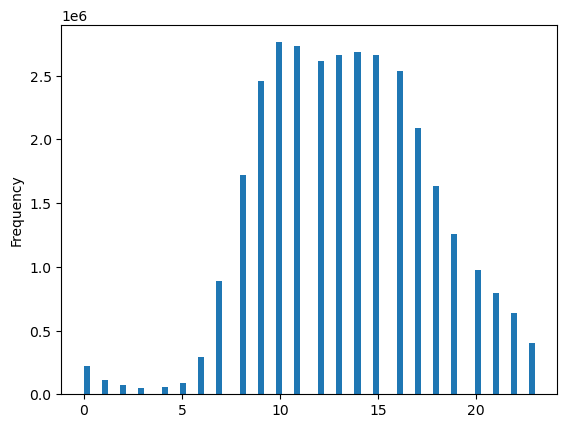

In [5]:
hist = df['order_time'].plot.hist(bins = 75)

###### The histogram shows that it starts to get busy at 07:00 and stays busy until 16:00 in which it starts to get less busy.
###### From 00:00 to 05:00, it is very slow, with little to no activity.

#### Bar chart for loyalty customers

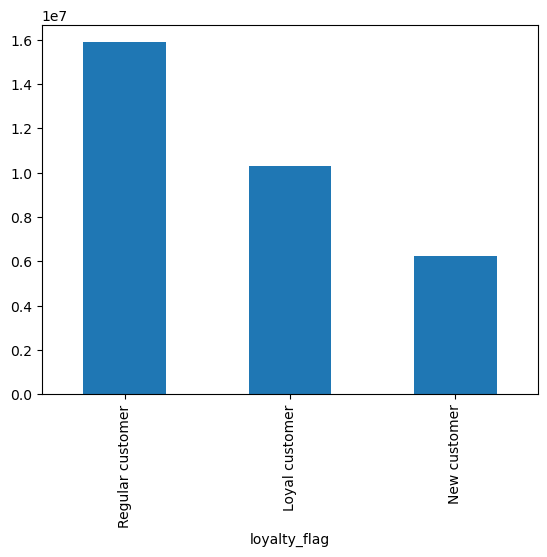

In [8]:
bar = df['loyalty_flag'].value_counts().plot.bar()

#### Sampling

In [10]:
# Create a list holding true/false values for random.rand <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [11]:
# Splitting dataset into big (70%) and small (30%) subsets

big = df[dev]
small = df[~dev]

In [12]:
# Quality check

len(df)

32404859

In [13]:
len(big) + len(small)

32404859

#### Line chart to compare prices and time of day

In [15]:
# Creating smaller dataset

df_2 = small[['prices', 'order_time']]

In [16]:
# Removing all the outlier prices

df_2.loc[df_2['prices'] >100, 'prices'] = np.nan

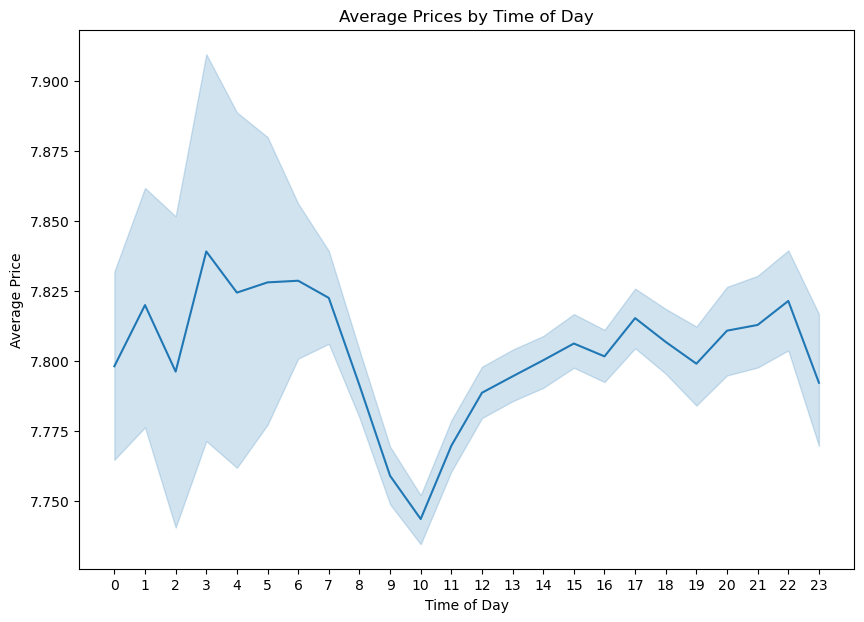

In [57]:
# Creating line chart

line = sns.lineplot(data = df_2, x= 'order_time', y= 'prices')

plt.title('Average Prices by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Price')
plt.xticks(range(24))
plt.gcf().set_size_inches(10, 7)
plt.show()

###### More expensive products are purchased very early in the morning. 
###### While throughout the day, the products purchased range from $10 - $15.

#### Line chart to compare age and family situation

In [20]:
# Creating smaller dataset 

df_3 = small[['age', 'n_dependants']]

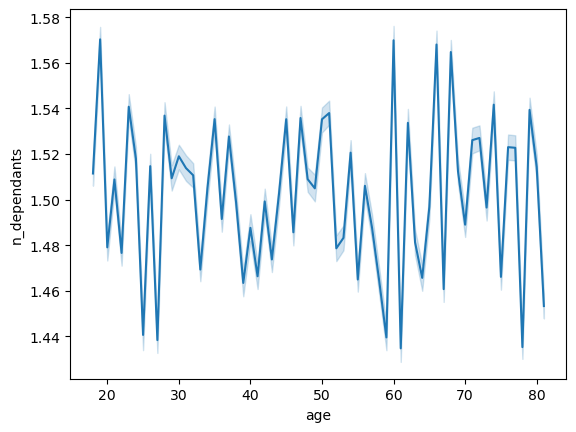

In [21]:
line_2 = sns.lineplot(data = df_3, x= 'age', y= 'n_dependants')

###### There is no correlation between age and number of dependents. 

#### Scatterplot to show income vs age

In [24]:
# Creating smaller dataset

df_4 = small[['age', 'income']]

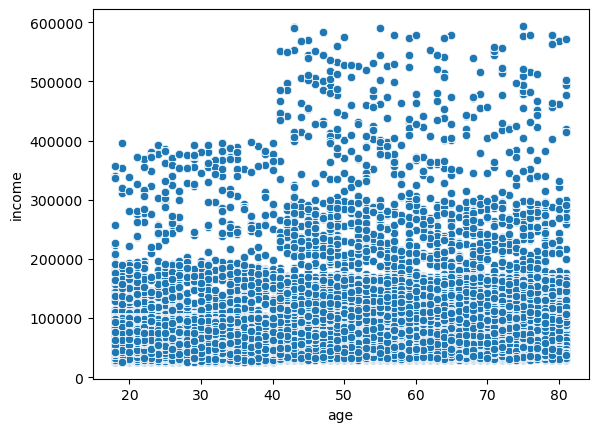

In [25]:
scatter = sns.scatterplot(data = df_4, x = 'age', y = 'income')

###### The majority of incomes fall below the 20,000 mark. 
###### From age 40, there are incomes above the 40,000 mark, which does not exist for anyone below 40. 
###### There is also a small gap up at age 40 where the people are making over $10,000 as compared to people under 40.

#### Exporting charts

In [28]:
# Order time histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_time.png'))

In [29]:
# Bar chart for loyalty customers

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

In [59]:
# Line chart for prices and time of day

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_time_of_day.png'))

In [31]:
# Line chart for age and family

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_family_status.png'))

In [32]:
# Scatterplot for age vs income

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))